In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC

import os
import joblib

In [2]:
import joblib
import pandas as pd
import numpy as np

In [3]:
cd ..

/Users/Anis/Adevinta/bot_detection_app


## Overview

In [4]:
os.path.join("data", "fake_users.csv")

'data/fake_users.csv'

In [5]:
dataset = pd.read_csv(os.path.join("data","fake_users.csv"), index_col = 0)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100473 entries, 0 to 100472
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   UserId    100473 non-null  object
 1   Event     100473 non-null  object
 2   Category  100473 non-null  object
 3   Fake      100473 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


No missing Data

0    5000
1     300
Name: Fake, dtype: int64


<AxesSubplot:ylabel='Fake'>

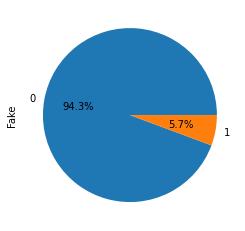

In [7]:
viz = dataset.groupby("UserId")["Fake"].min().value_counts()
print(viz)
viz.plot(kind='pie', autopct='%1.1f%%')

- The dataset contains logs of a span of five minutes each entry contains the user id, the action that a user made (Event), the category it interacted with (Category) and a column (Fake).
- There are 5300 differents users, 5000  (94.3%) are real users, 300 (5.7%) are fake.
- Thus, the Dataset is imbalanced
- We have 2 columns of interest for the Feature Engineering -- > Event Category

### An Example of a Fake user

In [8]:
# Fake
ID = "6476A07FCC"
display(dataset[dataset["UserId"] == ID])
display(dataset[dataset["UserId"] == ID]["Event"].value_counts())
display(dataset[dataset["UserId"] == ID]["Category"].value_counts())

,UserId,Event,Category,Fake
22,6476A07FCC,send_email,Leisure,1
719,6476A07FCC,send_email,Phone,1
4581,6476A07FCC,phone_call,Real_State,1
8320,6476A07FCC,send_sms,Leisure,1
9262,6476A07FCC,send_email,Leisure,1
11617,6476A07FCC,send_email,Motor,1
13164,6476A07FCC,click_ad,Leisure,1
13351,6476A07FCC,send_email,Phone,1
13713,6476A07FCC,click_ad,Phone,1
15508,6476A07FCC,click_ad,Leisure,1


send_email    21
click_ad      18
phone_call     4
send_sms       2
Name: Event, dtype: int64

Leisure       14
Phone          9
Motor          8
Real_State     6
Jobs           6
Holidays       2
Name: Category, dtype: int64

### An example of a real user

In [9]:
#Not Fake
ID = "00079D439D"
display(dataset[dataset["UserId"] == ID])
display(dataset[dataset["UserId"] == ID]["Event"].value_counts())
display(dataset[dataset["UserId"] == ID]["Category"].value_counts())

,UserId,Event,Category,Fake
40,00079D439D,send_email,Phone,0
3561,00079D439D,send_email,Holidays,0
12070,00079D439D,click_ad,Phone,0
16397,00079D439D,click_ad,Phone,0
23247,00079D439D,click_ad,Phone,0
25847,00079D439D,click_carrousel,Phone,0
33785,00079D439D,phone_call,Phone,0
45016,00079D439D,phone_call,Phone,0
45122,00079D439D,click_ad,Phone,0
57682,00079D439D,send_sms,Phone,0


click_ad           5
send_email         4
phone_call         4
click_carrousel    3
send_sms           3
Name: Event, dtype: int64

Phone       18
Holidays     1
Name: Category, dtype: int64

In Anomaly detection, I like to observe quickly the differences between groups to build intuition.
- Here, it looks like the Fake user has way more lines which means way more events.
- Furthermore, bots seem to generate more **send_email** and **click_ad** events.
- Last observation, there are much more categories browsed for the bot than for the real user.  
Let see if theses observation are correct for the whole Dataset. 


## Exploring Events

Let us see the behaviour of users regading Events
We will explore:
- The number of Events per user.
- The number of unique Events per user.
- The distribution of clicks. 

### The number of Events per user

In [10]:
viz = dataset.groupby("UserId")[["UserId", "Fake"]].agg({"UserId": "count", "Fake":"min"})
viz.columns = ["N_events", "Fake"]
viz.head()

,N_events,Fake
UserId,,
00079D439D,19,0
0007A4D4AE,20,0
000AFE2623,21,0
001A5362BC,16,0
0025995AF5,21,0


<AxesSubplot:xlabel='N_events', ylabel='Count'>

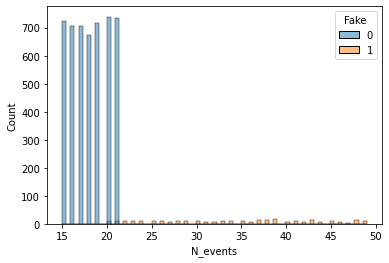

In [11]:
sns.histplot(data = viz, x = "N_events", hue = "Fake")

Most of people perform less than 20 events in the website, those have a very high probability to be real users.  
However when they perform more than 20 events, they are most likely bots.  
-- >  1st feature: The number of events per user

### The number of unique events per user

This features may overlap with some others, but as a first try, I'll include it aswell.

,N_unique_events_per_user,Fake_rate
0,2,1.000000
1,3,0.783784
2,4,0.177083
3,5,0.035234


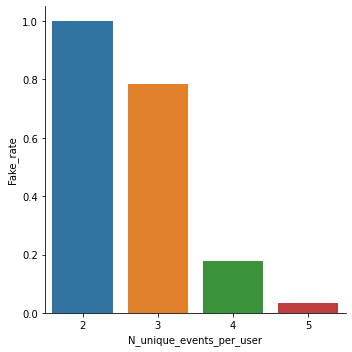

In [12]:
viz = (
        dataset
        .groupby("UserId")[["Event", "Fake"]]
        .agg({"Event": "nunique", "Fake":"min"})
        .groupby("Event")["Fake"].mean()
        .reset_index()
)

viz.columns = ["N_unique_events_per_user", "Fake_rate"]
display(viz.head())
sns.catplot(data = viz, x = "N_unique_events_per_user", y = "Fake_rate", kind = "bar")

 It seems there are more bots among users who perform few different events.  
--> 2nd Feature:  The amount of different events performed per user

### Distribution of clicks

In [13]:
viz = (
    dataset.groupby("Event")["Fake"].mean()
    .reset_index().sort_values("Fake")
)
viz.columns = ["Event", "Fake_rate"]
viz.head()

,Event,Fake_rate
2,phone_call,0.026641
4,send_sms,0.028062
1,click_carrousel,0.028927
0,click_ad,0.189766
3,send_email,0.201560


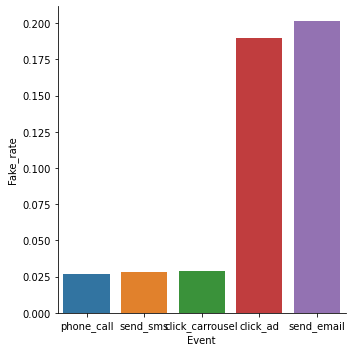

In [14]:
sns.catplot(data = viz, x = "Event", y = "Fake_rate", kind = "bar")

When the user is a bot, the Distribution of clicks is skewed towards click_ad and send_email.  
--> 3rd Feature: Clicks Distribution per user.

Let's get the distribution of clicks of each user 

In [15]:
### this function is used for aggregation. It returns a list of every clicks made by a user.
def get_list(series, column = "Event"):
    return " ".join(series)


In [16]:
vectorizer = CountVectorizer()
#dataset.groupby("UserId")["UserId"]
corpus = (
    dataset.groupby("UserId")[["Event", "Fake"]]
    .agg({"Event":get_list, "Fake": "min"})
)
X = vectorizer.fit_transform(corpus["Event"])
event_distribution = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out(), index = corpus.index)
event_distribution["Fake"] = corpus["Fake"]
event_distribution.head()

,click_ad,click_carrousel,phone_call,send_email,send_sms,Fake
UserId,,,,,,
00079D439D,5,3,4,4,3,0
0007A4D4AE,5,7,4,3,1,0
000AFE2623,3,4,3,4,7,0
001A5362BC,3,3,3,5,2,0
0025995AF5,4,7,3,3,4,0


## Exploring Categories

Let us see the behaviour of users regading Categories
We will explore:
- The distribution of Categories 
- The number of Categories browsed per user

### The distribution of Categories 

In [17]:
viz = dataset.groupby("Category")["Fake"].mean().reset_index().sort_values("Fake")
viz.head()

,Category,Fake
2,Leisure,0.096959
0,Holidays,0.100739
3,Motor,0.101136
1,Jobs,0.103790
4,Phone,0.106483


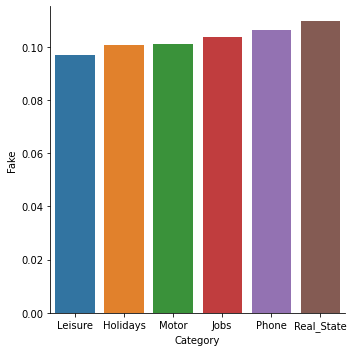

In [18]:
sns.catplot(data = viz, x = "Category", y = "Fake", kind = "bar")

It looks like there's no big differences between categories in term of fake rate.  
We cannot detect wether a user is a bot or a human based on the distribution of Categories.

### The number of Categories browsed per user

In [19]:
viz = dataset.groupby("UserId")[["Category", "Fake"]].agg({"Category": "nunique", "Fake":"mean"}).groupby("Category")["Fake"].mean().reset_index()
viz.columns = ["N_category_browsed", "Fake_Rate"]
viz.head(6)

,N_category_browsed,Fake_Rate
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.633929
5,6,0.915789


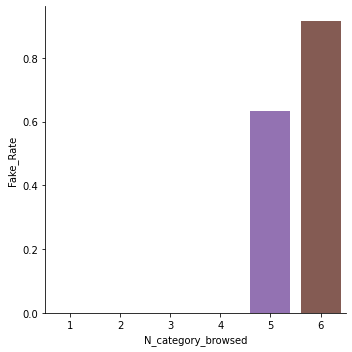

In [20]:
sns.catplot(data = viz, x = "N_category_browsed", y = "Fake_Rate", kind = "bar")

he number of categories browsed per user is a pretty neat way of detection.
When it is equal or more than 5, users are very likely to be bots.  
---> 4th feature: the number of categories browsed

## Model Selection

Recap:  
--> 1st Feature: The number of events performed by the user.  
--> 2nd Feature: The amount of different events performed per user.  
--> 3rd Feature: Clicks Distibution (it is in fact a set of features as it has 5 columns).  
--> 4th Feature: The number of categories browsed by the user.  

In [21]:
#Making the Design Matrix

dataset = pd.read_csv(os.path.join("data", "fake_users.csv"), index_col = 0)
df = dataset.groupby("UserId")[["Event", "Category"]].agg({"Event":["count", "nunique"], "Category": "nunique"})
df.columns = [" ".join(item) for item in df.columns]
df = df.merge( event_distribution, left_index = True, right_index = True)

scaler = StandardScaler()

X = df.iloc[:,:-1].to_numpy()
X = scaler.fit_transform(X)
y = df.iloc[:,-1].to_numpy()

df.head()

,Event count,Event nunique,Category nunique,click_ad,click_carrousel,phone_call,send_email,send_sms,Fake
UserId,,,,,,,,,
00079D439D,19,5,2,5,3,4,4,3,0
0007A4D4AE,20,5,2,5,7,4,3,1,0
000AFE2623,21,5,4,3,4,3,4,7,0
001A5362BC,16,5,2,3,3,3,5,2,0
0025995AF5,21,5,5,4,7,3,3,4,0


## Model Selection

Now, what result could we expect from the data ?
To help us answer this question, let's vizualise the data in 2D.
To do so, we will scale the Data and use the 2 first components of the PCA.

<AxesSubplot:>

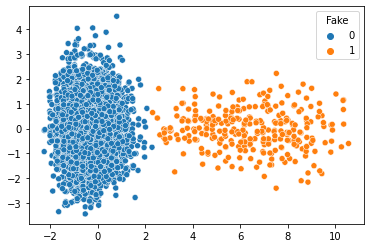

In [22]:
pca = PCA(n_components=2)
scaler = StandardScaler()
PCA_matrix = df.iloc[:,:-1].to_numpy() # data without labels
PCA_matrix = scaler.fit_transform(PCA_matrix)
PCA_matrix = pca.fit_transform(PCA_matrix)
sns.scatterplot(x = PCA_matrix[:,0], y = PCA_matrix[:,1], hue = df["Fake"])


**Observations:**  
The graph shows that given our features, the 2 groups can be perfectly separated with a line, which means:
- The Features are fine, we don't need more work on it.
- The 2 groups can be perfectly separated in a linear fashion which means even a Logistic Regression could get a score of 100%. This is interesting to know because if we tune it a bit, it could be a very simple and accurate model, which is perfect for production.

As we don't want to spend much time on fine tuning, let's see if there's another classifier, besides the Logistic Regression, that get's us a 100% score with default parameters. 

**Model Selection Methodology:**  
We will test the 4 following models:  LogisticRegression, GradientBoostingClassifier, RandomForestClassifier and SVM.
We want to pick the most accurate model and the most robust. To do so, we will perform a 5 Stratified Kfold cross validation.
For each model we compute the f1 score of each Kfold (Train and Test to make sure there is no overfitting) we then take the mean and the standard deviation to see which model has the best performances. We pick the F1 score as a metric because the dataset is imbalanced and we stratify so that we keep the same distribution as the original dataset.


In [23]:
clf = LogisticRegression()
gbc = GradientBoostingClassifier(n_estimators=50)
svc = SVC()
rfc = RandomForestClassifier(n_estimators=50)

for model in [clf, gbc, svc, rfc]:
    print(">>>", model)
    scores = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)
    print("train mean score:", scores["train_score"].mean(), "|", "train std score", scores["train_score"].std())
    print("test mean score:", scores["test_score"].mean(), "|", "test std score", scores["test_score"].std())
    

>>> LogisticRegression()
train mean score: 1.0 | train std score 0.0
test mean score: 0.9983193277310924 | test std score 0.0033613445378151583
>>> GradientBoostingClassifier(n_estimators=50)
train mean score: 1.0 | train std score 0.0
test mean score: 0.9983193277310924 | test std score 0.0033613445378151583
>>> SVC()
train mean score: 0.9995841995841996 | train std score 0.0008316008316008094
test mean score: 0.9983193277310924 | test std score 0.0033613445378151583
>>> RandomForestClassifier(n_estimators=50)
train mean score: 1.0 | train std score 0.0
test mean score: 1.0 | test std score 0.0


The Random Forest Classifier is flawless. No overfitting, an average score of 100% and a standard deviation of 0.  
This is the model that we are going to pick. Let's train it on 80% of the Data, validate it with the remaining 20%, and save it.

<AxesSubplot:>

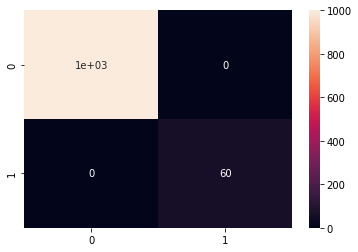

In [24]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
train_index, test_index = next(sss.split(X,y))
X_train, X_test, y_train, y_test = X[train_index,:], X[test_index,:], y[train_index], y[test_index]
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

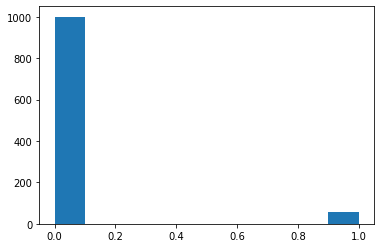

In [25]:
import matplotlib.pyplot as plt
y_probs = rfc.predict_proba(X_test)[:,1]
plt.hist(y_probs)
plt.show()

In [27]:
path_to_model = os.path.join("model", "RandomForestModel.sav")
with open(path_to_model, "wb") as f:
    joblib.dump(rfc, f)


## Results on Test set

In [28]:
rfc = joblib.load(path_to_model)

In [29]:

vectorizer = CountVectorizer()
dataset = pd.read_csv(os.path.join('data', 'fake_users_test.csv'))
df = dataset.groupby("UserId")[["Event", "Category"]].agg({"Event":["count", "nunique"], "Category": "nunique"})
df.columns = [" ".join(item) for item in df.columns]
#events distribution
corpus = dataset.groupby("UserId")[["Event", "Fake"]].agg({"Event":get_list, "Fake": "min"})
X = vectorizer.fit_transform(corpus["Event"])
event_distribution = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out(), index = corpus.index)
event_distribution["Fake"] = corpus["Fake"]
#merge
df = df.merge(event_distribution, left_index = True, right_index = True)

scaler = StandardScaler()
X_test = df.iloc[:,:-1].to_numpy()
X_test = scaler.fit_transform(X_test)
y_test = df.iloc[:,-1].to_numpy()

In [30]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        10

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



In [31]:
#Pipeline
path_to_model = os.path.join("model", "RandomForestModel.sav")
# input

dataset = pd.read_csv(os.path.join("data","fake_users_test.csv"))
model =joblib.load(path_to_model)

#X
df = dataset.groupby("UserId")[["Event", "Category"]].agg({"Event":["count", "nunique"], "Category": "nunique"})
df.columns = [" ".join(item) for item in df.columns]
corpus = dataset.groupby("UserId")[["Event"]].agg(get_list)
X = vectorizer.fit_transform(corpus["Event"])
event_distribution = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out(), index = corpus.index)
#merge
df = df.merge(event_distribution, left_index = True, right_index = True)
scaler = StandardScaler()
X = scaler.fit_transform(df)

#output
y_probs = model.predict_proba(X)[:,1]
output = pd.DataFrame(y_probs, index = df.index, columns = ["is_fake_probability"])
output

,is_fake_probability
UserId,
02B1149F07T,0.0
03E7EE785DT,0.0
09F94548B6T,0.0
0AA15A16ECT,0.0
0BADFD7019T,0.0
...,...
F866660C47T,0.0
F8B01BC688T,0.0
F9D53E8A10T,0.0


## Ideas to enhance the model

Firstly, we have to keep in mind that we worked only with Data coming from  a 5 minutes batch. If we perform well on this Dataset, it doesn't mean it will be the case in the future. Indeed, maybe we had luck, it was an easy one, and maybe the behaviour of the bots will change in the future. So we need to constantly improve our model. That is to say retraining the model on new data frequently, in case of a change in distribution.

To be even more robust, We could collect more data on users, such as:
- Ip adress of the user
- Browser of the user (Chrome, Opera, Safari, Firefox...)

In my experience, many many bots are working by default on a Firefox device. Furthermore we must pay attention to users coming from unusual countries. Lastly, we must Re-train frequently the model with new Data to prevent Data Drift.